### Import libraries:::::::

In [133]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.utils import shuffle
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, Callback
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score,precision_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.utils import resample
from imblearn.over_sampling import RandomOverSampler
label_encoder = LabelEncoder()

In [134]:
train_data = pd.read_csv('./data/train.csv')
test_data = pd.read_csv('./data/test.csv')

In [135]:
train_data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [136]:
train_data.drop(["Segmentation","ID"], axis=1, inplace=True)
test_data.drop(["ID"], axis=1, inplace=True)

In [137]:
train_data['Var_1'].unique()

array(['Cat_4', 'Cat_6', 'Cat_7', 'Cat_3', 'Cat_1', 'Cat_2', nan, 'Cat_5'],
      dtype=object)

In [138]:

train_data.loc[~train_data['Var_1'].isin(['Cat_4','Cat_6']), 'Var_1'] = 'Others'
train_data['Var_1'].unique()

array(['Cat_4', 'Cat_6', 'Others'], dtype=object)

In [139]:
train_data['Family_Size'] = train_data['Family_Size'].fillna(train_data['Family_Size'].mean())
train_data['Work_Experience'] = train_data['Work_Experience'].fillna(0.0)


In [140]:
married_classifier = DecisionTreeClassifier()
graduated_classifier = DecisionTreeClassifier()
profession_classifier = DecisionTreeClassifier()

train_data['Gender'] = label_encoder.fit_transform(train_data['Gender'])
temp_data = train_data.dropna()

X = temp_data[['Age', 'Gender']]
y_married = temp_data['Ever_Married']
y_graduated = temp_data['Graduated']
y_profession = temp_data['Profession']

married_classifier.fit(X, y_married)
graduated_classifier.fit(X, y_graduated)
profession_classifier.fit(X, y_profession)

missing_values_indices = train_data[train_data.isnull().any(axis=1)].index

predicted_marriage_status = married_classifier.predict(train_data.loc[missing_values_indices, ['Age', 'Gender']])
predicted_graduation_status = graduated_classifier.predict(train_data.loc[missing_values_indices, ['Age', 'Gender']])
predicted_profession_status = profession_classifier.predict(train_data.loc[missing_values_indices, ['Age', 'Gender']])

train_data.loc[missing_values_indices, 'Ever_Married'] = predicted_marriage_status
train_data.loc[missing_values_indices, 'Graduated'] = predicted_graduation_status
train_data.loc[missing_values_indices, 'Profession'] = predicted_profession_status

In [141]:
train_data.isnull().sum()

Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
dtype: int64

In [142]:
test_data.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6


In [143]:
test_data['Var_1'].unique()

array(['Cat_6', 'Cat_4', 'Cat_3', nan, 'Cat_1', 'Cat_2', 'Cat_5', 'Cat_7'],
      dtype=object)

In [144]:
test_data.loc[~test_data['Var_1'].isin(['Cat_4','Cat_6']), 'Var_1'] = 'Others'
test_data['Var_1'].unique()

array(['Cat_6', 'Cat_4', 'Others'], dtype=object)

In [145]:
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].mean())

In [146]:
test_data['Family_Size'] = test_data['Family_Size'].fillna(test_data['Family_Size'].mean())
test_data['Work_Experience'] = test_data['Work_Experience'].fillna(0.0)

In [147]:
test_data['Gender'] = label_encoder.fit_transform(test_data['Gender'])
temp_data = test_data.dropna()

X = temp_data[['Age', 'Gender']]
y_married = temp_data['Ever_Married']
y_graduated = temp_data['Graduated']
y_Profession = temp_data['Profession']

married_classifier.fit(X, y_married)
graduated_classifier.fit(X, y_graduated)
profession_classifier.fit(X, y_Profession)

missing_values_indices = test_data[test_data.isnull().any(axis=1)].index

predicted_marriage_status = married_classifier.predict(test_data.loc[missing_values_indices, ['Age', 'Gender']])
predicted_graduation_status = graduated_classifier.predict(test_data.loc[missing_values_indices, ['Age', 'Gender']])
predicted_profession_status = profession_classifier.predict(test_data.loc[missing_values_indices, ['Age', 'Gender']])

test_data.loc[missing_values_indices, 'Ever_Married'] = predicted_marriage_status
test_data.loc[missing_values_indices, 'Graduated'] = predicted_graduation_status
test_data.loc[missing_values_indices, 'Profession'] = predicted_profession_status

In [148]:
test_data.isnull().sum()

Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
dtype: int64

In [149]:
for feature in ['Gender','Ever_Married','Profession','Graduated','Spending_Score','Var_1']:
    train_data[feature] = label_encoder.fit_transform(train_data[feature])
    test_data[feature] = label_encoder.fit_transform(test_data[feature])

1.1 Shuffling of the data before training 

In [150]:
train_data = shuffle(train_data)
test_data = shuffle(test_data)

In [151]:
X_train, X_val, y_train, y_val = train_test_split(train_data.drop('Var_1', axis=1), train_data['Var_1'], test_size=0.2, random_state=42)
X_test = test_data.drop('Var_1', axis=1)
y_test = test_data['Var_1']

In [152]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.fit_transform(X_val)
X_test = scaler.transform(X_test)

In [153]:
onehot_encoder = OneHotEncoder(sparse_output=False, categories='auto')
y_train = onehot_encoder.fit_transform(np.array(y_train).reshape(-1, 1))
y_val = onehot_encoder.fit_transform(np.array(y_val).reshape(-1, 1))
y_test = onehot_encoder.fit_transform(np.array(y_test).reshape(-1, 1))

1.2 Design and train a neural network model (e.g. you can use DNN network or if you want to use any other models it
is also acceptable)

In [154]:
class F1Score(tf.keras.metrics.Metric):
    def __init__(self, name='f1_score', **kwargs):
        super().__init__(name=name, **kwargs)
        self.f1score = tf.keras.metrics.F1Score(average='macro')

    def update_state(self, y_true, y_pred, sample_weight=None):
        self.f1score.update_state(y_true, y_pred)

    def result(self):
        return self.f1score.result()

    def reset_state(self):
        self.f1score.reset_states()

In [155]:
nNmodel = Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(3, activation='softmax')
    ])

nNmodel.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_52 (Dense)            (None, 128)               1152      
                                                                 
 dropout_39 (Dropout)        (None, 128)               0         
                                                                 
 dense_53 (Dense)            (None, 64)                8256      
                                                                 
 dropout_40 (Dropout)        (None, 64)                0         
                                                                 
 dense_54 (Dense)            (None, 16)                1040      
                                                                 
 dropout_41 (Dropout)        (None, 16)                0         
                                                                 
 dense_55 (Dense)            (None, 3)               

In [156]:
nNmodel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy',F1Score()])

1.3 Use validation data for model tuning and monitor the f1-score while applying the early stopping logic from keras
library

In [157]:
early_stopping = EarlyStopping(monitor='val_f1_score', patience=25, restore_best_weights=True)
history = nNmodel.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/100


202/202 [==============================] - 1s 2ms/step - loss: 0.8887 - accuracy: 0.6398 - f1_score: 0.2737 - val_loss: 0.8374 - val_accuracy: 0.6555 - val_f1_score: 0.2640
Epoch 2/100
202/202 [==============================] - 0s 1ms/step - loss: 0.8527 - accuracy: 0.6480 - f1_score: 0.2830 - val_loss: 0.8347 - val_accuracy: 0.6561 - val_f1_score: 0.2732
Epoch 3/100
202/202 [==============================] - 0s 1ms/step - loss: 0.8464 - accuracy: 0.6491 - f1_score: 0.3104 - val_loss: 0.8332 - val_accuracy: 0.6623 - val_f1_score: 0.3039
Epoch 4/100
202/202 [==============================] - 0s 1ms/step - loss: 0.8415 - accuracy: 0.6515 - f1_score: 0.3157 - val_loss: 0.8310 - val_accuracy: 0.6574 - val_f1_score: 0.3177
Epoch 5/100
202/202 [==============================] - 0s 1ms/step - loss: 0.8378 - accuracy: 0.6528 - f1_score: 0.3262 - val_loss: 0.8304 - val_accuracy: 0.6592 - val_f1_score: 0.3154
Epoch 6/100
202/202 [==============================] - 0s 1ms/step - loss: 0.8364 - acc

1.4 Use test data to calculate the appropriate classification metrics.

In [158]:
y_pred = nNmodel.predict(X_test)
print(classification_report(np.argmax(y_test,axis=1), np.argmax(y_pred, axis=1), zero_division=1))

83/83 [==============================] - 0s 812us/step
              precision    recall  f1-score   support

           0       1.00      0.00      0.00       386
           1       0.64      1.00      0.78      1672
           2       1.00      0.00      0.00       569

    accuracy                           0.64      2627
   macro avg       0.88      0.33      0.26      2627
weighted avg       0.77      0.64      0.50      2627



1.5 Explain the significance of each metrics. e.g what recall denotes in terms of multi class classification.

- Looking at the classification report, we can see that overall correctness of the model is 64%. High recall indicates a low number of false negatives, meaning the model is effective at identifying instances of that class as we can see 100% for the class 1 whilst 0 for other classes. In terms of multiclass classfication, recall means the ratio of true positives for the respective class to the sum of false negative and true positives for that class. Also the precision on the classes are 100%, 64% and 100% respectively for 0,1,2 classes. We call see there is higher support for class 1 thats it has higher accuracy than any other class.

1.6 Generate the loss and f1-score curve for training and validation set.

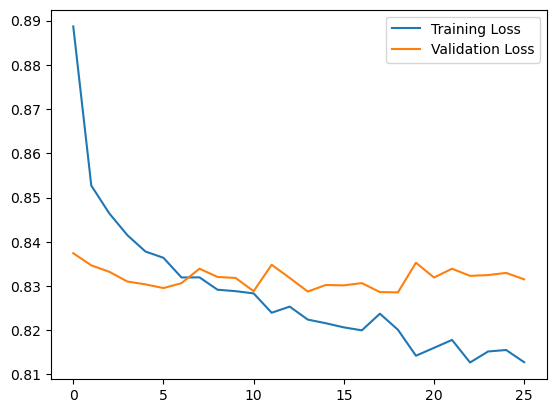

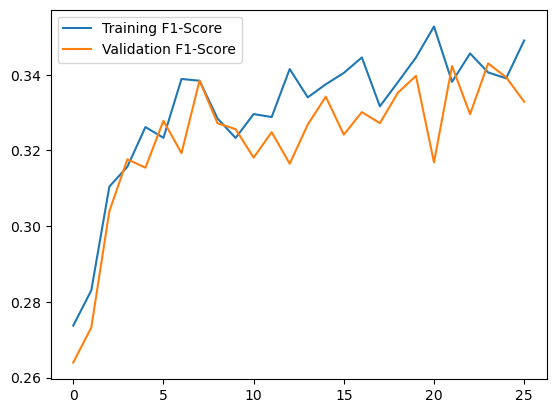

In [159]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

plt.plot(history.history['f1_score'], label='Training F1-Score')
plt.plot(history.history['val_f1_score'], label='Validation F1-Score')
plt.legend()
plt.show()

1.7 Generate a ROC-AUC curve and comment on your model accuracy and find the optimal threshold from the curve.

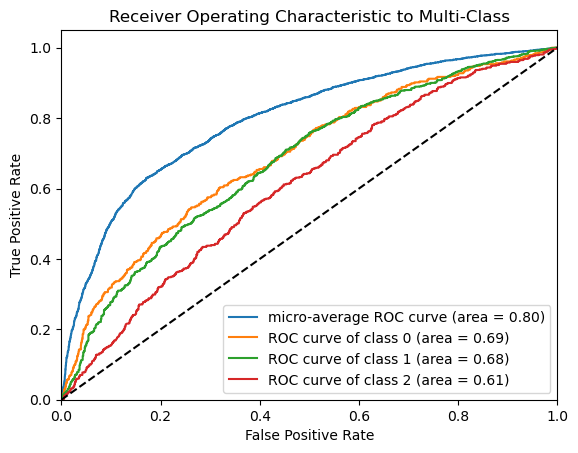

In [160]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]))
for i in range(3):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic to Multi-Class')
plt.legend(loc="lower right")
plt.show()


- The Roc curve shows on average the area covered by the curve is 80% and also lie in positive side of the line which incdicates the overall predictive nature is overall good for all instance of classes. Looking on individual class roc curve, class 0 shows higher coverage at 0.69% while class 2 have lower coverage than class 0. But all class have more that 60% coverage of the area. The individual area represents ability of the model to distinguish between class and the other classes.

In [161]:
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    optimal_idx = np.argmax(tpr[i] - fpr[i])
    optimal_threshold = thresholds[optimal_idx]
    print(f"Optimal Threshold for class {i}:", optimal_threshold)

Optimal Threshold for class 0: 0.564729
Optimal Threshold for class 1: 0.4643884
Optimal Threshold for class 2: 0.51506186


1.8 Repeating with sampling in training set.

In [162]:
sampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = sampler.fit_resample(X_train, y_train)
X_train_resampled = X_train_resampled.astype('float32')
y_train_resampled = y_train_resampled.astype('float32')

In [163]:
# X_train_resampled, y_train_resampled = resample(X_train, y_train, n_samples=10000, random_state=42)
print(X_train_resampled.shape)
print(y_train_resampled.shape)

(12540, 8)
(12540, 3)


In [164]:
nNmodel = Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(8,)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(3, activation='softmax')
    ])

nNmodel.summary()
nNmodel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy',F1Score()],run_eagerly=True)

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_56 (Dense)            (None, 128)               1152      
                                                                 
 dropout_42 (Dropout)        (None, 128)               0         
                                                                 
 dense_57 (Dense)            (None, 64)                8256      
                                                                 
 dropout_43 (Dropout)        (None, 64)                0         
                                                                 
 dense_58 (Dense)            (None, 16)                1040      
                                                                 
 dropout_44 (Dropout)        (None, 16)                0         
                                                                 
 dense_59 (Dense)            (None, 3)               

In [165]:
early_stopping = EarlyStopping(monitor='val_f1_score', patience=25, restore_best_weights=True)
history = nNmodel.fit(X_train_resampled, y_train_resampled, epochs=100, validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/100
  4/392 [..............................] - ETA: 7s - loss: 1.1544 - accuracy: 0.2891 - f1_score: 0.2460 

392/392 [==============================] - 8s 21ms/step - loss: 1.0527 - accuracy: 0.4309 - f1_score: 0.4227 - val_loss: 1.0876 - val_accuracy: 0.4833 - val_f1_score: 0.4123
Epoch 2/100
392/392 [==============================] - 9s 22ms/step - loss: 1.0327 - accuracy: 0.4594 - f1_score: 0.4580 - val_loss: 1.0327 - val_accuracy: 0.5056 - val_f1_score: 0.4328
Epoch 3/100
392/392 [==============================] - 8s 21ms/step - loss: 1.0232 - accuracy: 0.4648 - f1_score: 0.4636 - val_loss: 1.0232 - val_accuracy: 0.4864 - val_f1_score: 0.4295
Epoch 4/100
392/392 [==============================] - 8s 22ms/step - loss: 1.0209 - accuracy: 0.4706 - f1_score: 0.4709 - val_loss: 1.0366 - val_accuracy: 0.4882 - val_f1_score: 0.4264
Epoch 5/100
392/392 [==============================] - 8s 22ms/step - loss: 1.0151 - accuracy: 0.4743 - f1_score: 0.4749 - val_loss: 1.0314 - val_accuracy: 0.4802 - val_f1_score: 0.4211
Epoch 6/100
392/392 [==============================] - 9s 22ms/step - loss: 1.0110

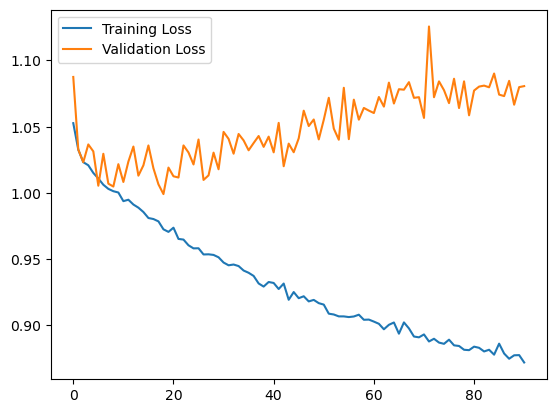

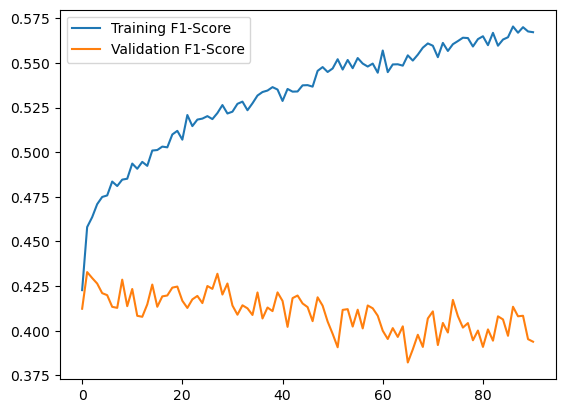

In [166]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

plt.plot(history.history['f1_score'], label='Training F1-Score')
plt.plot(history.history['val_f1_score'], label='Validation F1-Score')
plt.legend()
plt.show()

In [167]:
y_pred = nNmodel.predict(X_test)
print(classification_report(np.argmax(y_test,axis=1), np.argmax(y_pred, axis=1), zero_division=1))

83/83 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.32      0.55      0.41       386
           1       0.81      0.43      0.56      1672
           2       0.30      0.56      0.39       569

    accuracy                           0.48      2627
   macro avg       0.48      0.52      0.45      2627
weighted avg       0.63      0.48      0.50      2627



- The 

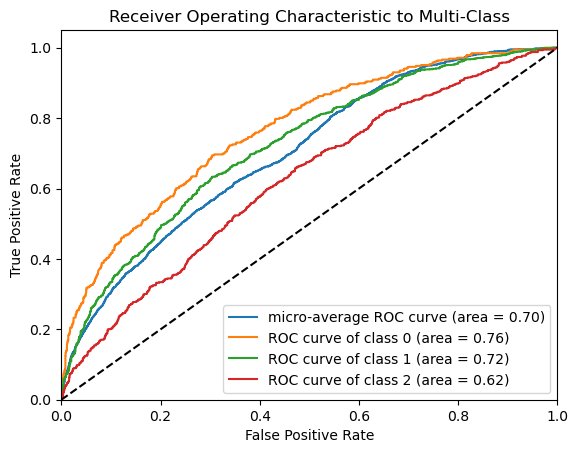

In [168]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]))
for i in range(3):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic to Multi-Class')
plt.legend(loc="lower right")
plt.show()


- The area coverage in roc curve seems increased for the class 0 and class 1 for oversampled data than the original data but negligible change for class 2. The overall area coverage is 70% which also indicates the overall model is good at identifying most of the instances of the classes.

In [169]:
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    optimal_idx = np.argmax(tpr[i] - fpr[i])
    optimal_threshold = thresholds[optimal_idx]
    print(f"Optimal Threshold for class {i}:", optimal_threshold)

Optimal Threshold for class 0: 0.5538419
Optimal Threshold for class 1: 0.5180509
Optimal Threshold for class 2: 0.505217


### Conclusion::::
Oversampled data is showing the much more longer time to reach the earlystop point, also the loss started from more than 100%. while using oversampled sampler, the datatype was needed to made float type to run; I added run_eagerly=True to train the model because of some missing data due to the over sampling. Also regarding the loss and f1score curve for trainning and validation data set for original data shows decreasing and steady pattern respectively whilst the trend is seems increasing for both of the dataset. The optimal thershold on the roc curve was nearly similar for both original and oversampled dataset which are as:

#### for oversampled:
- Optimal Threshold for class 0: 0.564729
- Optimal Threshold for class 1: 0.4643884
- Optimal Threshold for class 2: 0.51506186

#### for original
- Optimal Threshold for class 0: 0.5538419
- Optimal Threshold for class 1: 0.5180509
- Optimal Threshold for class 2: 0.505217
